<h1><center>Renewable Energy Generation and Energy Demand Prediction as a Univariate Time Series using Supervised Machine Learning Algorithms</center> </h1>


#### Project Aim
To analyze the factors affecting the renewable energy generation and power demand of a certain region, and build a ML model to predict the future energy demand and renewable energy generation.


<h2><b>1. Import Libraries</b></h2>

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from math import sqrt

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
sns.set_theme()
sns.set_palette("bright")

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

<h2><b>2. Load and Explore the Energy Data</b></h2>

In [2]:
# load the energy data csv file
df_en = pd.read_csv('data/energy_dataset.csv') 
df_en.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [4]:
df_en.shape # checking the no. of rows and columns in data

(35064, 29)

In [5]:
df_en.columns # give names of all columns (instead of shape and column info can be used as below)

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [6]:
df_en.info() # it will give more information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [7]:
df_en.describe() # gives insights for the numerical datas

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


<h2><b>3. Load and Explore the Weather Data</b></h2>

In [3]:
# load the weather data csv file
df_w = pd.read_csv('data/weather_features.csv')  
df_w.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [9]:
df_w.shape # checking the no. of rows and columns in data

(178396, 17)

In [10]:
df_w.columns # give names of all columns (instead of shape and column info can be used as below)

Index(['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

In [11]:
df_w.info() # it will give more information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [12]:
df_w.describe() # gives insights for the numerical datas

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.000000,178396.000000,178396.000000,1.783960e+05,178396.000000,178396.00000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000
mean,289.618605,288.330442,291.091267,1.069261e+03,68.423457,2.47056,166.591190,0.075492,0.000380,0.004763,25.073292,759.831902
std,8.026199,7.955491,8.612454,5.969632e+03,21.902888,2.09591,116.611927,0.398847,0.007288,0.222604,30.774129,108.733223
min,262.240000,262.240000,262.240000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,283.670000,282.483602,284.650000,1.013000e+03,53.000000,1.00000,55.000000,0.000000,0.000000,0.000000,0.000000,800.000000
50%,289.150000,288.150000,290.150000,1.018000e+03,72.000000,2.00000,177.000000,0.000000,0.000000,0.000000,20.000000,800.000000
75%,295.150000,293.730125,297.150000,1.022000e+03,87.000000,4.00000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000
max,315.600000,315.150000,321.150000,1.008371e+06,100.000000,133.00000,360.000000,12.000000,2.315000,21.500000,100.000000,804.000000


<h2><b>4. Combining Both Data</b></h2>

<b>The issue was the energy data is for whole country but the weather data is divided into 5 major cities.</b><br>
<b>So we coverted the weather data into single by taking average of the 5 cities each feature and converting into one.</b><br>
<b>Then we merged the Energy Data and the Converted Weather Data to proceed with further exploration.</b><br>

In [13]:
# convert date strings to datetime datatype
df_en['time'] = pd.to_datetime(df_en['time'])

In [14]:
# convert date strings to datetime datatype
df_w['time'] = pd.to_datetime(df_w['dt_iso'])
df_w.drop(['dt_iso','temp_min','temp_max','wind_deg','weather_id','weather_description','weather_icon','weather_main'],axis=1,inplace=True)

In [15]:
# Aggregating the values for different cities into single values
bar, bil, mad, sev, val = [x for _, x in df_w.groupby('city_name')]
wea = [bar, bil, mad, sev, val]
df = df_en

for cty in wea:
    city = cty['city_name'].unique()
    city = str(city[0])[:4]
    cty = cty.add_suffix('_{}'.format(city))
    col = 'time_'+ city
    cty['time']=cty[col]
    cty.drop(col,axis=1,inplace=True)
    df = df.merge(cty, on=['time'], how='outer')
    df = df.drop('city_name_{}'.format(city), axis=1)

In [16]:
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,snow_3h_Sevi,clouds_all_Sevi,temp_Vale,pressure_Vale,humidity_Vale,wind_speed_Vale,rain_1h_Vale,rain_3h_Vale,snow_3h_Vale,clouds_all_Vale
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,0.0,0,270.475,1001,77,1,0.0,0.0,0.0,0
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,0.0,0,270.475,1001,77,1,0.0,0.0,0.0,0
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,0.0,0,269.686,1002,78,0,0.0,0.0,0.0,0
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,0.0,0,269.686,1002,78,0,0.0,0.0,0.0,0
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,0.0,0,269.686,1002,78,0,0.0,0.0,0.0,0


In [17]:
# grouping same parameters
Temp=['temp_ Bar','temp_Bilb','temp_Madr','temp_Sevi','temp_Vale']
Pres=['pressure_ Bar','pressure_Bilb','pressure_Madr','pressure_Sevi','pressure_Vale']
Hum =['humidity_ Bar','humidity_Bilb','humidity_Madr','humidity_Sevi','humidity_Vale']
Wind=['wind_speed_ Bar','wind_speed_Bilb','wind_speed_Madr','wind_speed_Sevi','wind_speed_Vale']
Rain1=['rain_1h_ Bar','rain_1h_Bilb','rain_1h_Madr','rain_1h_Sevi','rain_1h_Vale']
Rain3 =['rain_3h_ Bar','rain_3h_Bilb','rain_3h_Madr','rain_3h_Sevi','rain_3h_Vale']
Snow3=['snow_3h_ Bar','snow_3h_Bilb','snow_3h_Madr','snow_3h_Sevi','snow_3h_Vale']
Cloud =['clouds_all_ Bar','clouds_all_Bilb','clouds_all_Madr','clouds_all_Sevi','clouds_all_Vale']

In [18]:
# adding mean for each parameters
df['Temperature']= df[Temp].mean(axis=1)
df['Pressure']= df[Pres].mean(axis=1)
df['Humidity']= df[Hum].mean(axis=1)
df['Wind_Speed']= df[Wind].mean(axis=1)
df['Rain_1h']= df[Rain1].mean(axis=1)
df['Rain_3h']= df[Rain3].mean(axis=1)
df['Snow_3h']= df[Snow3].mean(axis=1)
df['Cloud']= df[Cloud].mean(axis=1)

In [19]:
# Dropping all the individual parameters
df.drop(Temp,axis=1,inplace=True)
df.drop(Pres,axis=1,inplace=True)
df.drop(Hum,axis=1,inplace=True)
df.drop(Wind,axis=1,inplace=True)
df.drop(Rain1,axis=1,inplace=True)
df.drop(Rain3,axis=1,inplace=True)
df.drop(Snow3,axis=1,inplace=True)
df.drop(Cloud,axis=1,inplace=True)

<h2><b>5.Preprocess and clean the data</b></h2>

In [20]:
df['generation hydro']=df[['generation hydro run-of-river and poundage','generation hydro water reservoir']].sum(axis=1)
df.drop(['generation hydro pumped storage aggregated','generation hydro run-of-river and poundage','generation hydro water reservoir',
         'forecast wind offshore eday ahead','forecast wind onshore day ahead',
         'forecast solar day ahead','total load forecast','price day ahead','price actual'], axis = 1,inplace=True)

In [21]:
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,total load actual,Temperature,Pressure,Humidity,Wind_Speed,Rain_1h,Rain_3h,Snow_3h,Cloud,generation hydro
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,25385.0,272.491463,1016.4,82.4,2.0,0.0,0.0,0.0,0.0,2950.0
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,24382.0,272.512700,1016.2,82.4,2.0,0.0,0.0,0.0,0.0,2667.0
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,22734.0,272.099137,1016.8,82.0,2.4,0.0,0.0,0.0,0.0,2344.0
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,21286.0,272.089469,1016.6,82.0,2.4,0.0,0.0,0.0,0.0,1728.0
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,20264.0,272.145900,1016.6,82.0,2.4,0.0,0.0,0.0,0.0,1673.0


In [22]:
df.drop_duplicates()  # remove duplicate from data (there is no duplicates)
df.shape

(38568, 29)

In [23]:
pd.isnull(df).sum() # checking the missing values 

time                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil coal-derived gas             18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation fossil oil shale                    18
generation fossil peat                         18
generation geothermal                          18
generation hydro pumped storage consumption    19
generation marine                              19
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind offshore                       18
generation wind onshore                        18
total load actual                              36


In [24]:
# drop all the null value rows
df = df.dropna()
df.reset_index(drop=True, inplace=True)

In [25]:
df.shape # checking shape after removing null

(38522, 29)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38522 entries, 0 to 38521
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         38522 non-null  object 
 1   generation biomass                           38522 non-null  float64
 2   generation fossil brown coal/lignite         38522 non-null  float64
 3   generation fossil coal-derived gas           38522 non-null  float64
 4   generation fossil gas                        38522 non-null  float64
 5   generation fossil hard coal                  38522 non-null  float64
 6   generation fossil oil                        38522 non-null  float64
 7   generation fossil oil shale                  38522 non-null  float64
 8   generation fossil peat                       38522 non-null  float64
 9   generation geothermal                        38522 non-null  float64
 10

<b>As per initial assumption both energy and weather follow a trend with seasons and months.</b><br>
<b>So we added features for month, year and season in our data</b><br>

In [27]:
# Seperate column for month and year
df['time'] = pd.to_datetime(df['time'],utc=True)
df['month'] = pd.DatetimeIndex(df['time']).month
df['year'] = pd.DatetimeIndex(df['time']).year
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,Pressure,Humidity,Wind_Speed,Rain_1h,Rain_3h,Snow_3h,Cloud,generation hydro,month,year
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1016.4,82.4,2.0,0.0,0.0,0.0,0.0,2950.0,12,2014
1,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,1016.2,82.4,2.0,0.0,0.0,0.0,0.0,2667.0,1,2015
2,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,1016.8,82.0,2.4,0.0,0.0,0.0,0.0,2344.0,1,2015
3,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,1016.6,82.0,2.4,0.0,0.0,0.0,0.0,1728.0,1,2015
4,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,1016.6,82.0,2.4,0.0,0.0,0.0,0.0,1673.0,1,2015


In [28]:
# add seasons as per months
def season(x):
    month_season = {  1:'Winter_start', 2:'Winter_mid', 3:'Winter_end',
                    4:'Spring_start', 5:'Spring_mid', 6:'Spring_end',
                    7:'Summer_start', 8:'Summer_mid', 9:'Summer_end',
                    10:'Autumn_start', 11:'Autumn_mid', 12:'Autumn_end',}
    return month_season[x]

season_l=[]
for month in df['month']:
    x = season(int(month))
    season_l.append(x)
df['season']= season_l

<b> Calculate the Total Energy generated by Renewable resources which will be the sum of Solar, Wind, Hydro, Combustible Renewables and other renewable resources.</b>

In [29]:
Renewable_Resources=['generation geothermal','generation hydro','generation marine', 'generation other renewable',
                     'generation solar','generation wind offshore','generation wind onshore']
df['Gen_Energy']= df[Renewable_Resources].sum(axis=1)

In [30]:
df = df.iloc[1: , :]
df.reset_index(drop=True,inplace=True)

In [31]:
data_check_test = df[['time']]
data_check_test.reset_index(drop=True,inplace=True)

<h2><b>6. Exploratory Data Analysis</b></h2>

In [32]:
# data preperation for the pie chart
x=[df['generation biomass'].mean(), df['generation fossil brown coal/lignite'].mean(),
   df['generation fossil gas'].mean(),df['generation fossil hard coal'].mean(),
   df['generation fossil oil'].mean(), df['generation hydro'].mean(),
   df['generation nuclear'].mean(),df['generation solar'].mean(), 
   df['generation waste'].mean(),df['generation wind onshore'].mean()]

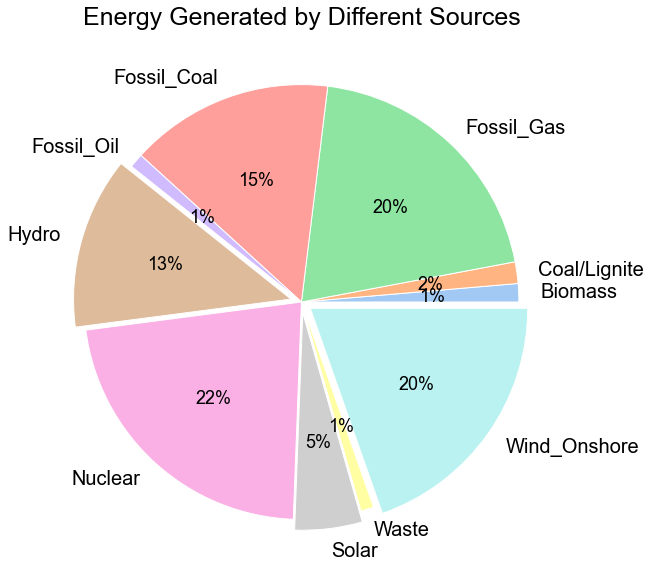

In [33]:
# Pie chart to show Energy generated by different sources
plt.subplots(figsize=(10,10))
labels=['Biomass', 'Coal/Lignite', 'Fossil_Gas', 'Fossil_Coal','Fossil_Oil',
        'Hydro','Nuclear','Solar','Waste','Wind_Onshore']
explode=[0,0,0,0,0,0.05,0,0.05,0,0.05]
colors = sns.color_palette('pastel')[0:]
patch,texts,autotexts = plt.pie(data=df, x=x,labels = labels,explode=explode, autopct='%.0f%%',colors=colors)
for text in texts:
    text.set_color('black')
    text.set_size(20)
for text in autotexts:
    text.set_color('black')
    text.set_size(18)
plt.title('Energy Generated by Different Sources',color='black',size=25)
plt.show()

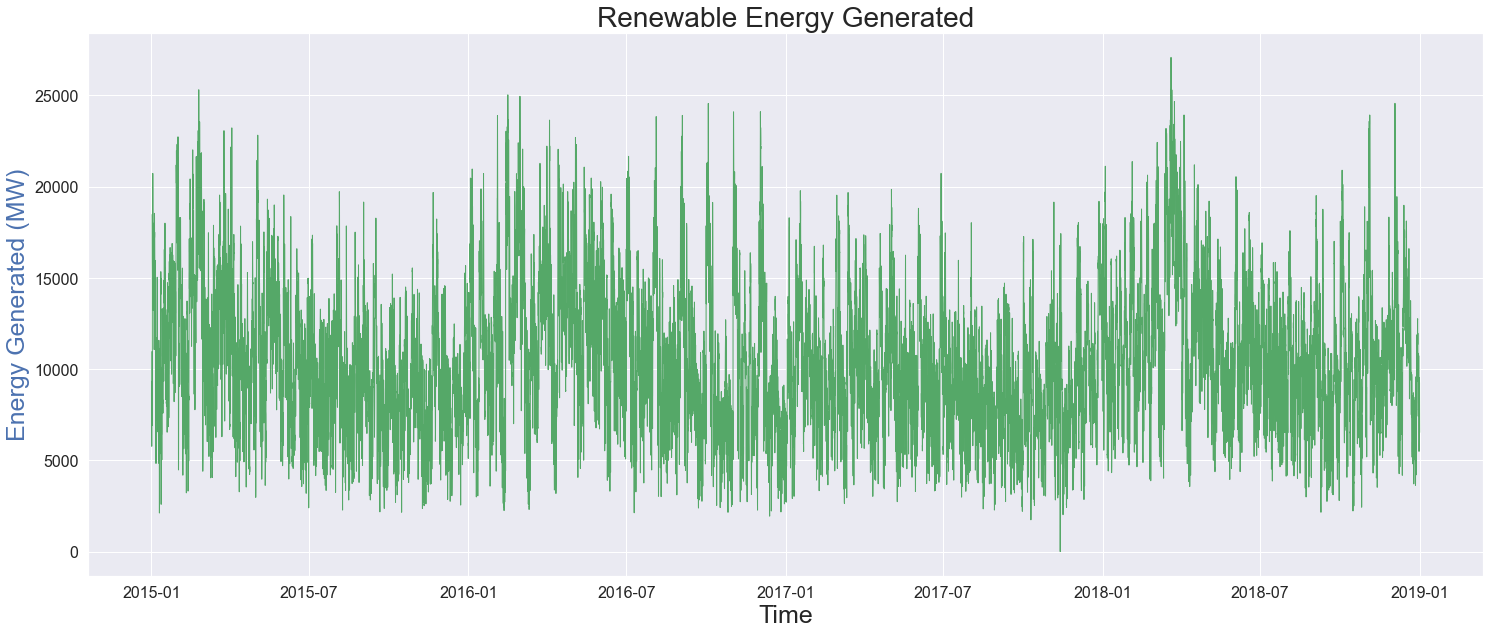

In [34]:
# Renewable Energy Generated Over 2015 to 2018 in Spain
fig,axe =plt.subplots(figsize=(25,10))
plot1=sns.lineplot(data=df, x="time",y="Gen_Energy",lw=1,color='g')
plt.xlabel('Time',size=25)
plt.ylabel('Energy Generated (MW)',size=25, color='b')
plt.title('Renewable Energy Generated',size=28)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

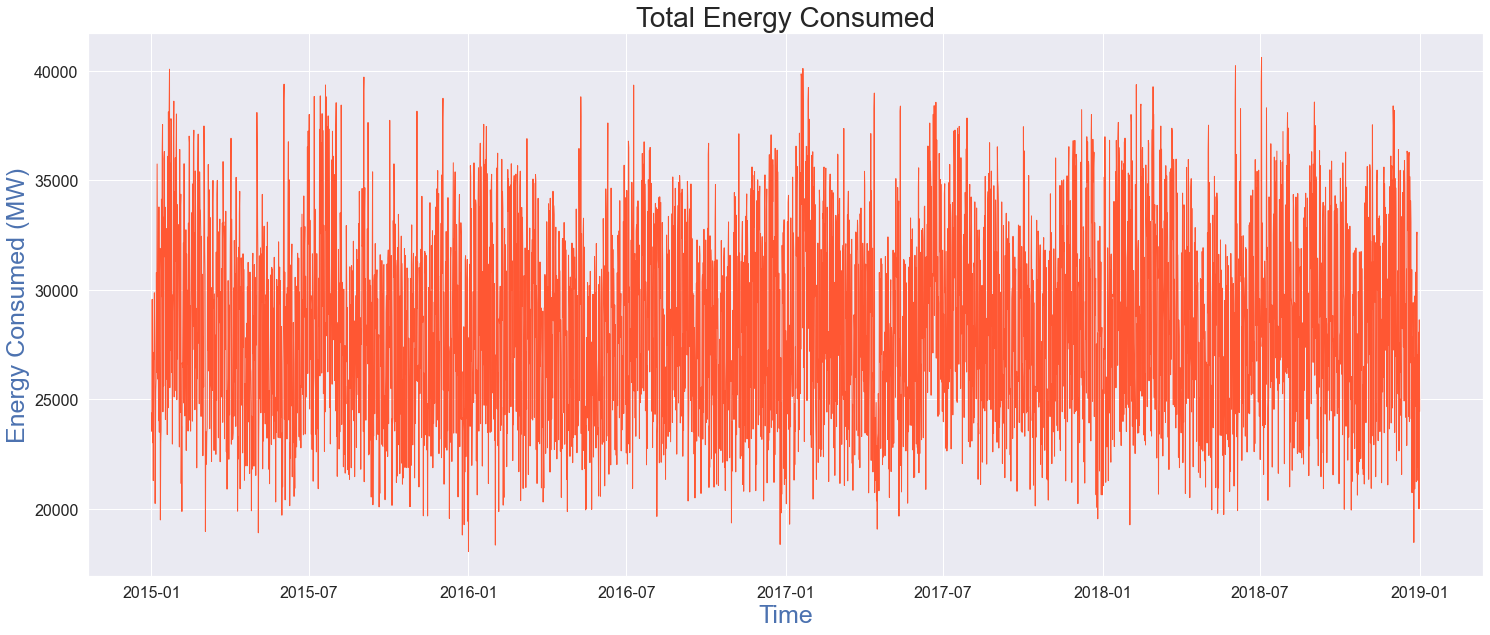

In [35]:
# Energy Consumed during 2015 to 2018 in Spain
plt.figure(figsize=(25,10))
plot1=sns.lineplot(data=df[::10], x="time",y="total load actual",lw=1,color='#FF5733')
plt.xlabel('Time',size=25,color='b')
plt.ylabel('Energy Consumed (MW)',size=25, color='b')
plt.title('Total Energy Consumed',size=28)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

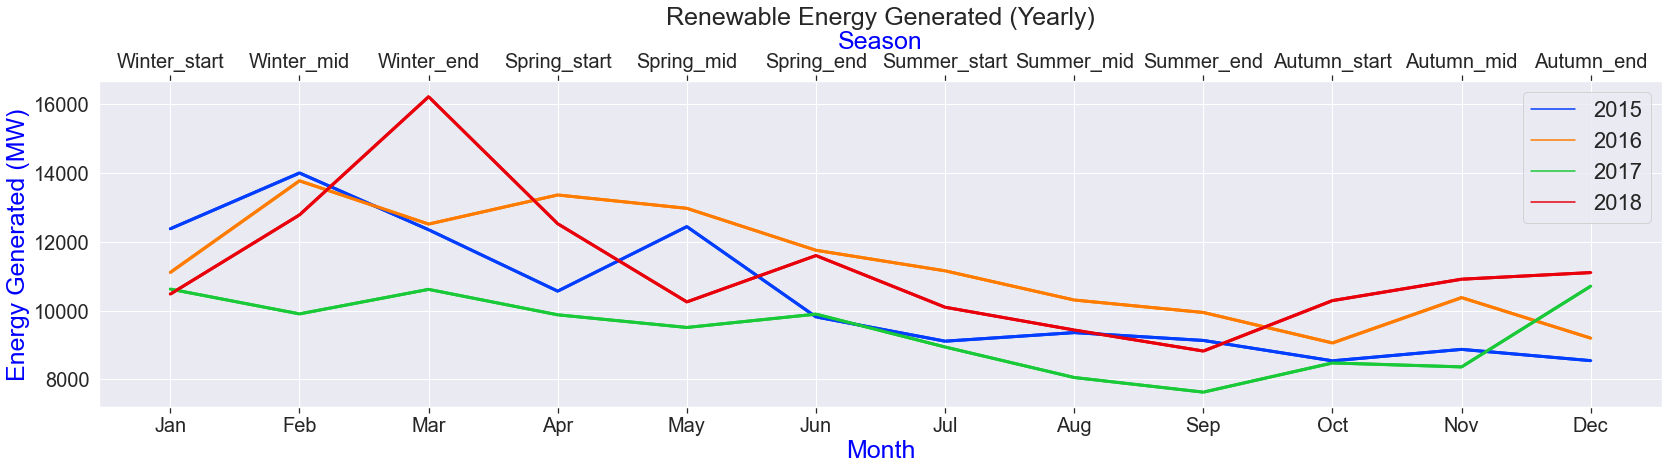

In [36]:
# Energy Generated each Year
fig,ax = plt.subplots(figsize=(28,6))
ax=sns.lineplot(data=df, x="month",y="Gen_Energy",hue='year',palette='bright',lw=3,ci=10)
plt.xticks(np.arange(1,13),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax2 = ax.twiny()
sns.lineplot(data=df, x="season",y="Gen_Energy",hue='year',palette='bright',lw=3,ci=None)
ax.set_xlabel('Month',size=25, color='blue')
ax2.set_xlabel('Season',size=25, color='blue')
ax.set_ylabel('Energy Generated (MW)',size=25, color='blue')
plt.title('Renewable Energy Generated (Yearly)',size=25,)
ax.tick_params(axis='y', labelsize=20,)
ax.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax.get_legend().remove()
ax2.legend(loc='upper right',prop={'size': 22})
plt.show()

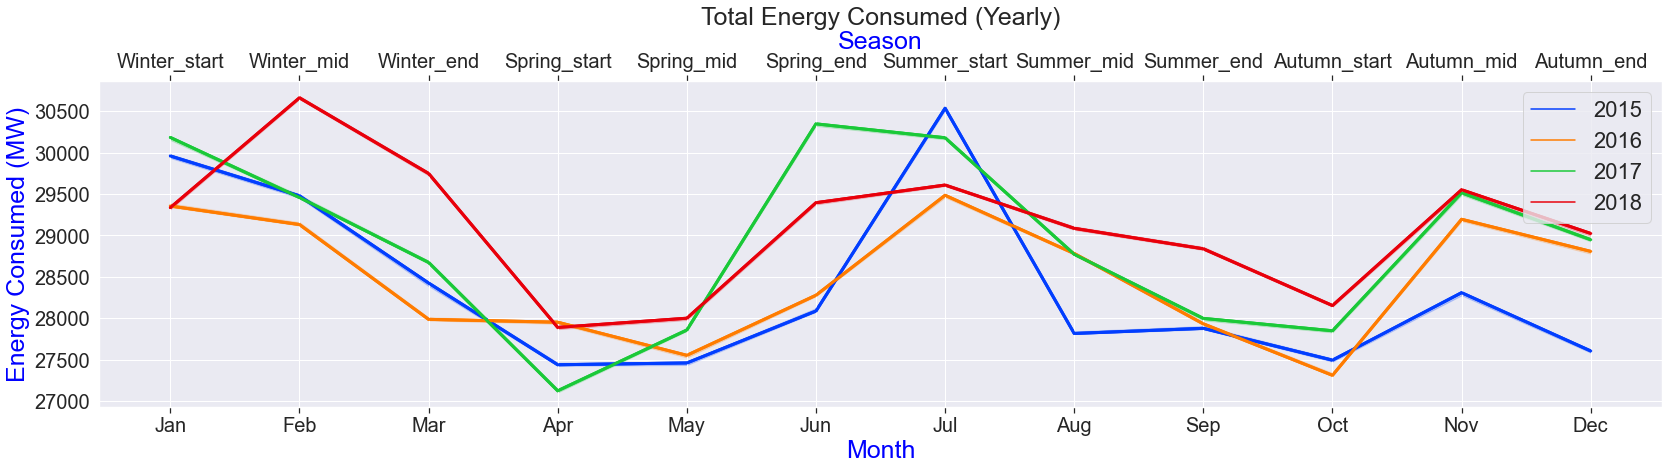

In [37]:
# Energy Consumed each Year
fig,ax = plt.subplots(figsize=(28,6))
ax=sns.lineplot(data=df, x="month",y="total load actual",hue='year',palette='bright',lw=3,ci=10)
plt.xticks(np.arange(1,13),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax2 = ax.twiny()
sns.lineplot(data=df, x="season",y="total load actual",hue='year',palette='bright',lw=3,ci=None)
ax.set_xlabel('Month',size=25, color='blue')
ax2.set_xlabel('Season',size=25, color='blue')
ax.set_ylabel('Energy Consumed (MW)',size=25, color='blue')
plt.title('Total Energy Consumed (Yearly)',size=25,)
ax.tick_params(axis='y', labelsize=20,)
ax.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax.get_legend().remove()
ax2.legend(loc='upper right',prop={'size': 22})
plt.show()

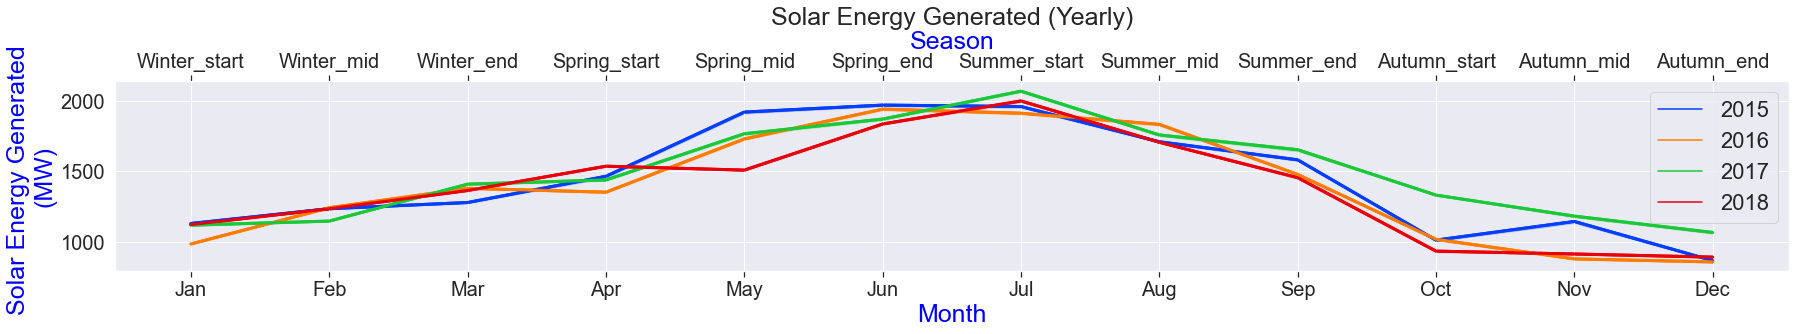

In [38]:
# Solar Energy Generated each Year
fig,ax = plt.subplots(figsize=(30,3.5))
ax=sns.lineplot(data=df, x="month",y="generation solar",hue='year',palette='bright',lw=3,ci=10)
plt.xticks(np.arange(1,13),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax2 = ax.twiny()
sns.lineplot(data=df, x="season",y="generation solar",hue='year',palette='bright',lw=3,ci=None)
ax.set_xlabel('Month',size=25, color='blue')
ax2.set_xlabel('Season',size=25, color='blue')
ax.set_ylabel('Solar Energy Generated \n(MW)',size=25, color='blue')
plt.title('Solar Energy Generated (Yearly)',size=25)
ax.tick_params(axis='y', labelsize=20,)
ax.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax.get_legend().remove()
ax2.legend(loc='upper right',prop={'size': 22})
plt.show()

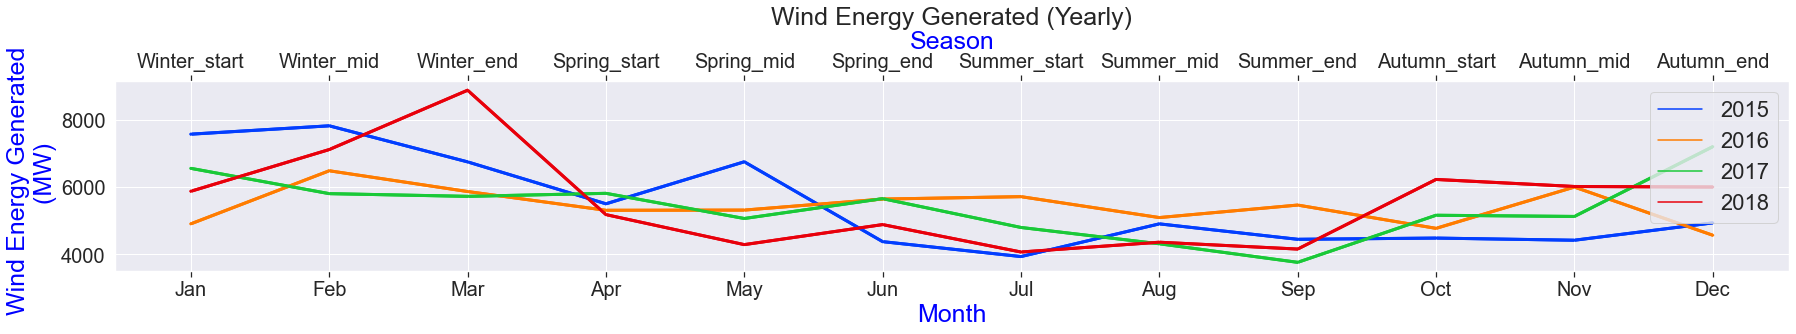

In [39]:
# Wind Energy Generated each Year
fig,ax = plt.subplots(figsize=(30,3.5))
ax=sns.lineplot(data=df, x="month",y="generation wind onshore",hue='year',palette='bright',lw=3,ci=10)
plt.xticks(np.arange(1,13),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax2 = ax.twiny()
sns.lineplot(data=df, x="season",y="generation wind onshore",hue='year',palette='bright',lw=3,ci=None)
ax.set_xlabel('Month',size=25,color='blue')
ax2.set_xlabel('Season',size=25,color='blue')
ax.set_ylabel('Wind Energy Generated \n (MW)',size=25,color='blue')
plt.title('Wind Energy Generated (Yearly)',size=25)
ax.tick_params(axis='y', labelsize=20,)
ax.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax.get_legend().remove()
ax2.legend(loc='upper right',prop={'size': 22})
plt.show()

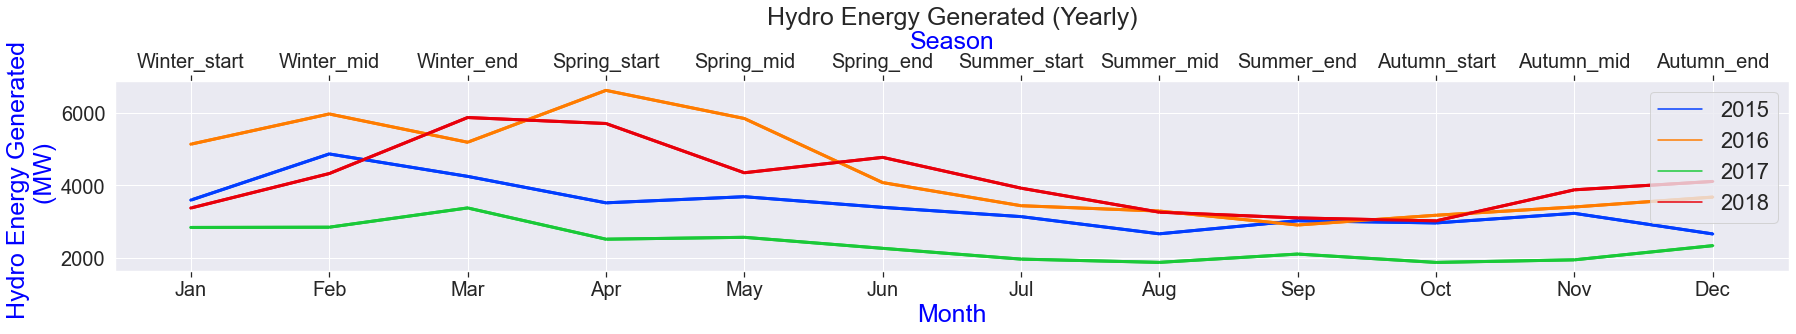

In [40]:
# Hydro Energy Generated each Year
fig,ax = plt.subplots(figsize=(30,3.5))
ax=sns.lineplot(data=df, x="month",y="generation hydro",hue='year',palette='bright',lw=3,ci=10)
plt.xticks(np.arange(1,13),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax2 = ax.twiny()
sns.lineplot(data=df, x="season",y="generation hydro",hue='year',palette='bright',lw=3,ci=None)
ax.set_xlabel('Month',size=25,color='blue')
ax2.set_xlabel('Season',size=25,color='blue')
ax.set_ylabel('Hydro Energy Generated \n (MW)',size=25,color='blue')
plt.title('Hydro Energy Generated (Yearly)',size=25)
ax.tick_params(axis='y', labelsize=20,)
ax.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='x', labelsize=20)
ax.get_legend().remove()
ax2.legend(loc='upper right',prop={'size': 22})
plt.show()

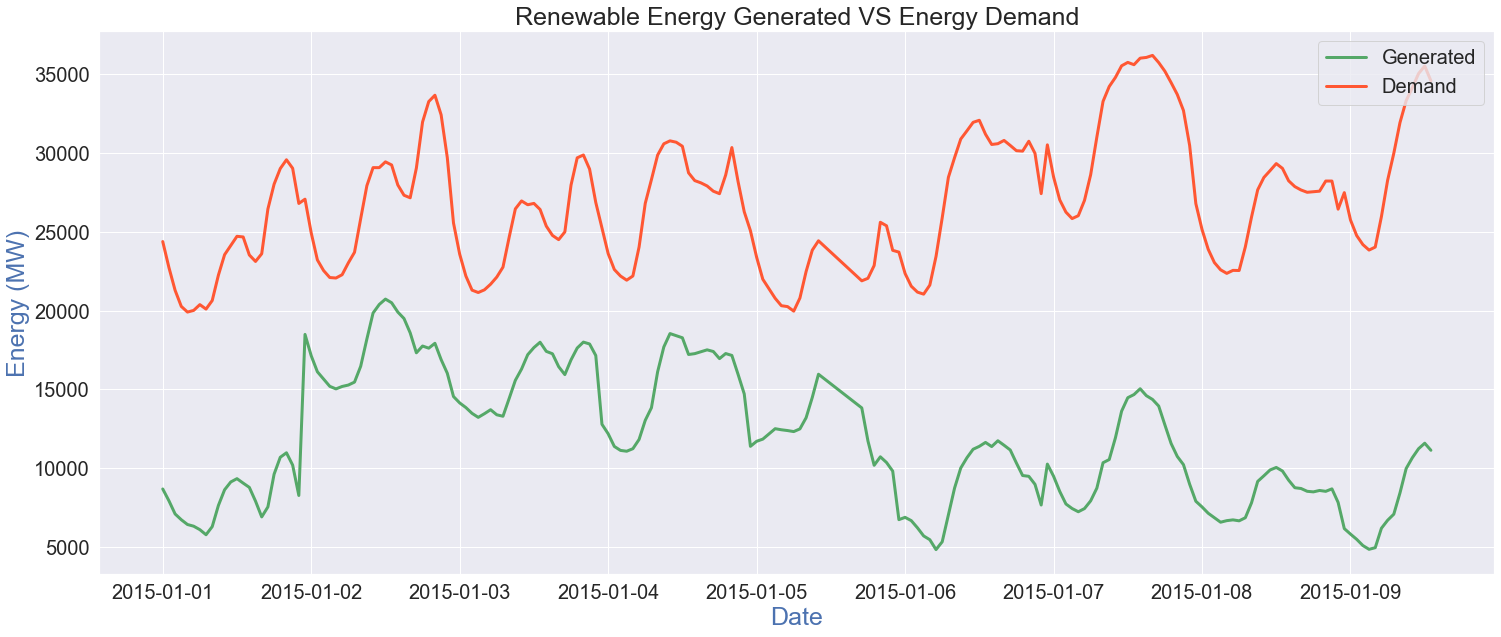

In [41]:
# Renewable Energy Generated VS Energy Demand
plt.subplots(figsize=(25,10))
plot1=sns.lineplot(data=df[:200], x="time",y="Gen_Energy",color='g',label='Generated',lw=3)
plot1=sns.lineplot(data=df[:200], x="time",y="total load actual",color='#FF5733',label='Demand',lw=3)
plt.legend(loc="upper right",fontsize=20)
plt.xlabel('Date',size=25, color='b')
plt.ylabel('Energy (MW)',size=25, color='b')
plt.xticks(size=20)
plt.yticks(size=20)
plt.title('Renewable Energy Generated VS Energy Demand',size=25)
plt.show()

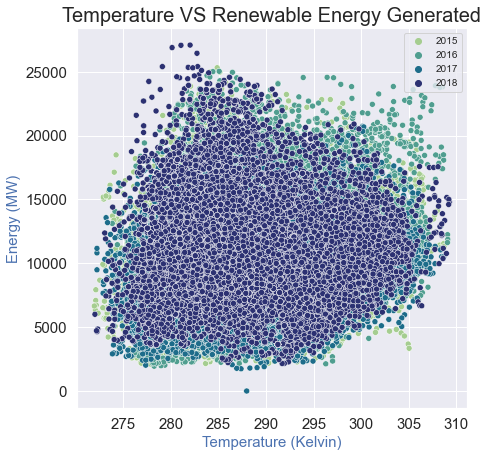

In [42]:
# Temperature Vs Energy 
plt.subplots(figsize=(7,7))
sns.scatterplot(data=df, x="Temperature",y="Gen_Energy", hue='year', palette ='crest')
plt.legend(loc="upper right",fontsize=10)
plt.xlabel('Temperature (Kelvin)',size=15, color='b')
plt.ylabel('Energy (MW)',size=15, color='b')
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Temperature VS Renewable Energy Generated',size=20)
plt.show()

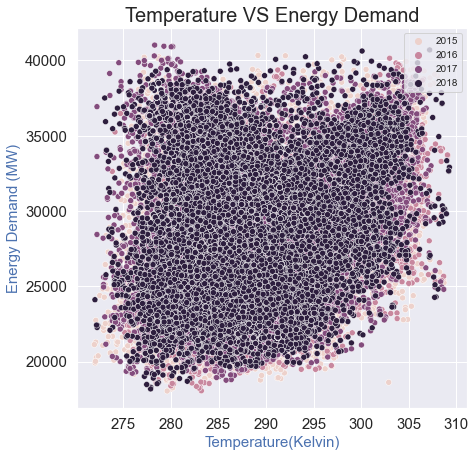

In [43]:
# Temperature VS Energy Demand
plt.subplots(figsize=(7,7))
sns.scatterplot(data=df, x="Temperature",y="total load actual", hue='year')
plt.legend(loc="upper right",fontsize=10)
plt.xlabel('Temperature(Kelvin)',size=15, color='b')
plt.ylabel('Energy Demand (MW)',size=15, color='b')
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Temperature VS Energy Demand',size=20)
plt.show()

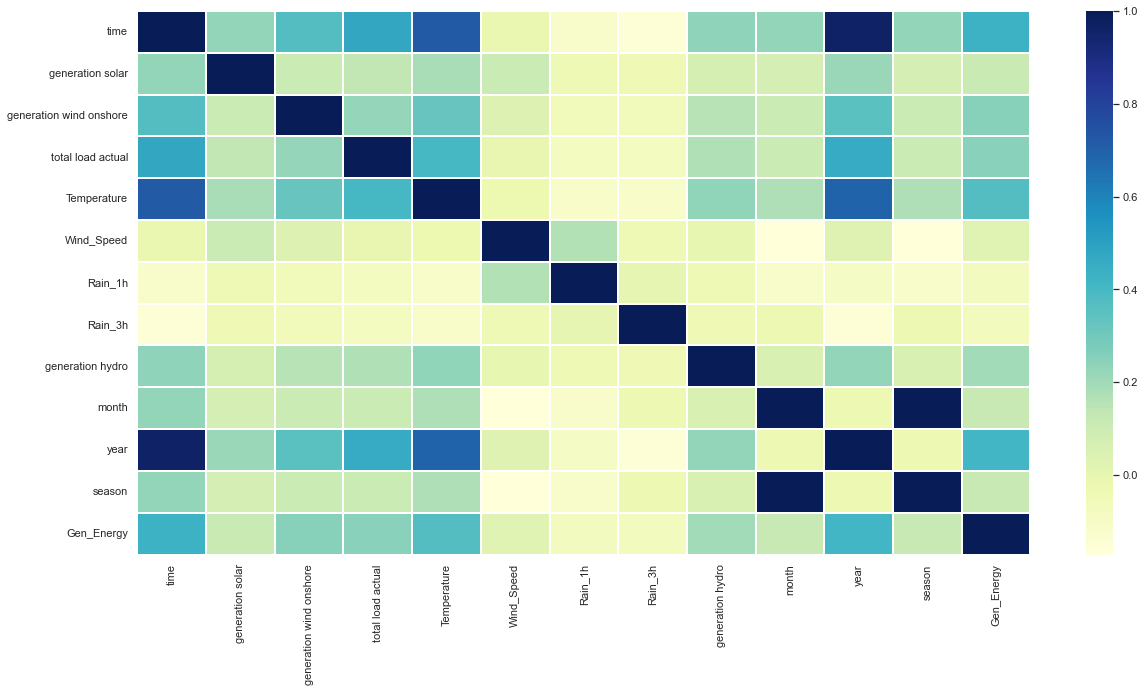

In [44]:
# Heatmap
plt.figure(figsize=(20, 10))
df_n = df.drop(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage consumption',
       'generation marine', 'generation nuclear', 'generation other',
       'generation other renewable','generation waste',
       'generation wind offshore','Pressure', 'Humidity','Snow_3h', 'Cloud'], axis=1)
corr = df_n.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

<h2><b>7. Principal Component Analysis</b></h2>

In [45]:
# Important features and standardize them
df_pca = df[[ 'generation solar', 'generation waste', 'generation wind onshore',
       'total load actual', 'Temperature', 'Pressure', 'Humidity',
       'Wind_Speed', 'Rain_1h', 'Rain_3h', 'Snow_3h', 'Cloud',
       'generation hydro', 'month', 'year', 'Gen_Energy']]
v_pca = df_pca.dropna().values
scaler = StandardScaler()
scaler.fit(v_pca)
v_pca = scaler.transform(v_pca)
# PCA modelling
pca = PCA(n_components=15).fit(v_pca)
print(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))


[18.73 33.78 43.95 51.65 59.07 65.36 71.6  77.68 83.19 87.48 91.11 94.38
 97.24 98.86 99.99]


In [46]:
dominance = pd.DataFrame(pca.components_, columns=df_pca.columns, index =['PC' + str(n+1) for n in range(pca.n_components_)])
dominance.head()

,generation solar,generation waste,generation wind onshore,total load actual,Temperature,Pressure,Humidity,Wind_Speed,Rain_1h,Rain_3h,Snow_3h,Cloud,generation hydro,month,year,Gen_Energy
PC1,0.314364,-0.165863,0.259994,0.357699,0.180859,0.020738,-0.348167,0.345216,0.105768,0.009309,0.032919,0.067816,0.325745,-0.177543,-0.038238,0.498533
PC2,-0.337420,-0.228664,0.296172,-0.127353,-0.466689,0.041580,0.419928,0.093450,0.270599,0.033306,0.077779,0.365029,0.147785,-0.230588,-0.084796,0.171735
PC3,0.038419,-0.600270,-0.127836,-0.163620,0.125025,0.037385,-0.082668,-0.139643,0.045425,0.211437,0.098465,-0.158415,0.013174,0.075866,-0.676653,-0.079846
PC4,0.098915,0.108244,0.093664,-0.231624,0.227222,0.050643,-0.142474,0.432835,0.426698,-0.059395,0.158629,0.340304,-0.524775,0.129703,-0.102793,-0.157767
PC5,0.238279,0.073715,-0.629516,0.299059,-0.041709,0.023384,0.112950,-0.060266,0.299158,0.036841,0.249400,0.336024,0.290521,-0.148641,-0.005698,-0.246763


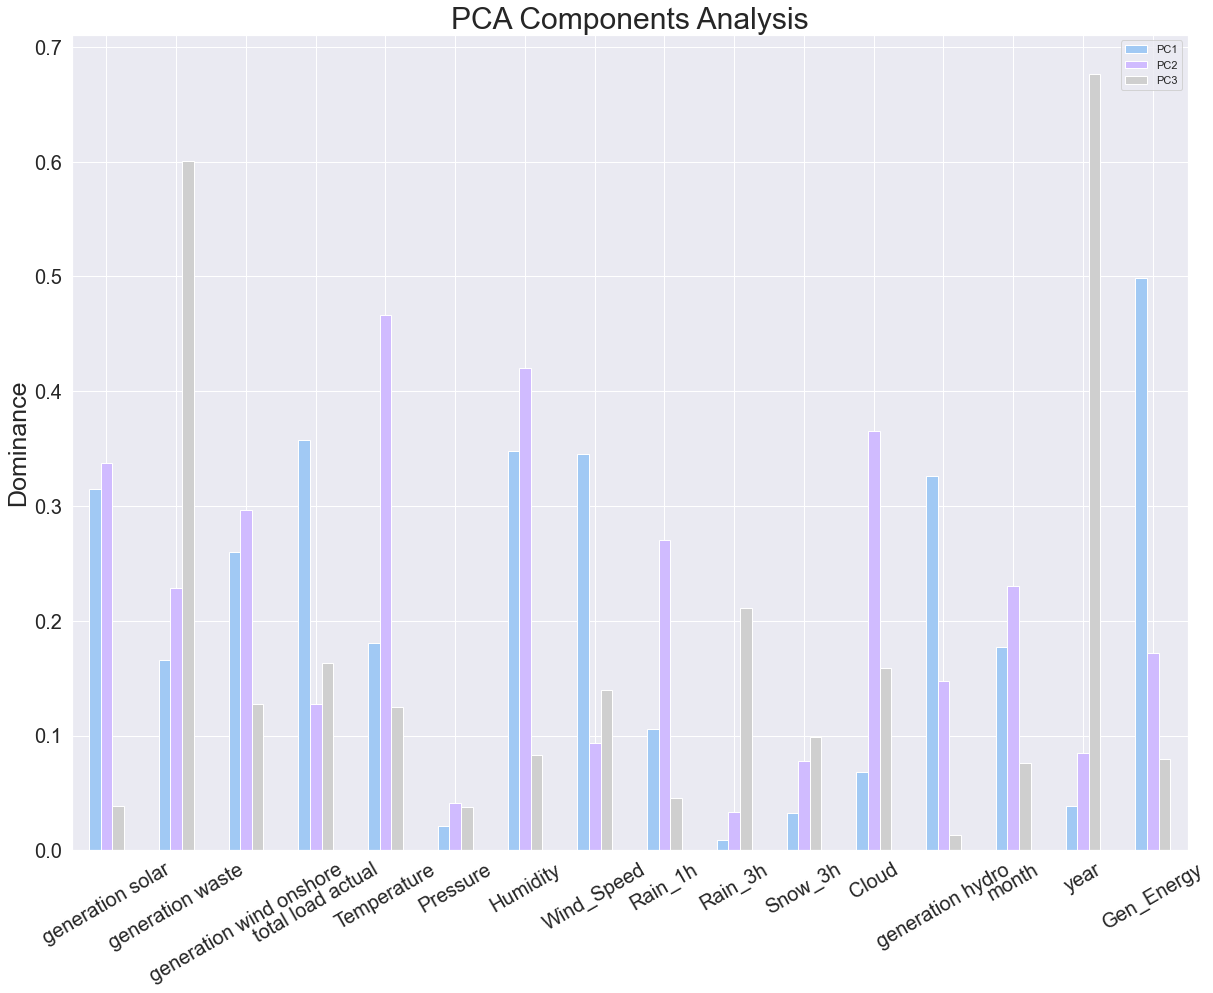

In [47]:
# plot the dominance of the compenents 
fig, ax = plt.subplots(figsize=(20,15))
cmap = ListedColormap(sns.color_palette("pastel",8)) 
abs(dominance.iloc[:3, :].T).plot(kind='bar', ax=ax,cmap=cmap)
ax.set_title('PCA Components Analysis', fontsize=30)
ax.set_ylabel('Dominance', fontsize=25)
ax.set_xticklabels(['generation solar', 'generation waste', 'generation wind onshore',
       'total load actual', 'Temperature', 'Pressure', 'Humidity',
       'Wind_Speed', 'Rain_1h', 'Rain_3h', 'Snow_3h', 'Cloud',
       'generation hydro', 'month', 'year', 'Gen_Energy'], rotation=30, fontsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.legend(loc='best')

fig.show();

<h1><b>8. Timeseries Prediction for Renewable Energy Generation</b></h1>

In [48]:
# function to generate previous time series data
def n_prev_data(N):
    m = datae.shape[0]
    for j in range(1,N):
        nth_value = [None]*j + [datae['Gen_Energy'][i-j] for i in range(j, m)]
        new_col = "{}_{}".format('Gen_Energy', j)
        datae[new_col] = nth_value

In [49]:
# data preperation for LR
datae=df[['Gen_Energy']]
n_prev_data(10)
datae.dropna(inplace=True)
datae.reset_index(drop=True,inplace=True)
datae.head()

,Gen_Energy,Gen_Energy_1,Gen_Energy_2,Gen_Energy_3,Gen_Energy_4,Gen_Energy_5,Gen_Energy_6,Gen_Energy_7,Gen_Energy_8,Gen_Energy_9
0,7632.0,6288.0,5772.0,6094.0,6314.0,6421.0,6724.0,7091.0,7928.0,8678.0
1,8626.0,7632.0,6288.0,5772.0,6094.0,6314.0,6421.0,6724.0,7091.0,7928.0
2,9122.0,8626.0,7632.0,6288.0,5772.0,6094.0,6314.0,6421.0,6724.0,7091.0
3,9331.0,9122.0,8626.0,7632.0,6288.0,5772.0,6094.0,6314.0,6421.0,6724.0
4,9049.0,9331.0,9122.0,8626.0,7632.0,6288.0,5772.0,6094.0,6314.0,6421.0


In [50]:
datae.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gen_Energy,38512.0,10578.440694,4113.040548,0.0,7569.00,10164.5,13139.0,27086.0
Gen_Energy_1,38512.0,10578.434436,4113.046892,0.0,7569.00,10164.5,13139.0,27086.0
Gen_Energy_2,38512.0,10578.404991,4113.077243,0.0,7569.00,10164.5,13139.0,27086.0
Gen_Energy_3,38512.0,10578.365704,4113.112851,0.0,7569.00,10164.5,13139.0,27086.0
Gen_Energy_4,38512.0,10578.308449,4113.156865,0.0,7568.75,10164.5,13139.0,27086.0
Gen_Energy_5,38512.0,10578.234628,4113.205967,0.0,7568.00,10164.5,13139.0,27086.0
Gen_Energy_6,38512.0,10578.189915,4113.238506,0.0,7568.00,10164.5,13139.0,27086.0
Gen_Energy_7,38512.0,10578.173660,4113.251050,0.0,7567.75,10164.5,13139.0,27086.0
Gen_Energy_8,38512.0,10578.162131,4113.257856,0.0,7567.75,10164.5,13139.0,27086.0
Gen_Energy_9,38512.0,10578.154835,4113.260977,0.0,7567.75,10164.5,13139.0,27086.0


<Figure size 100x100 with 0 Axes>

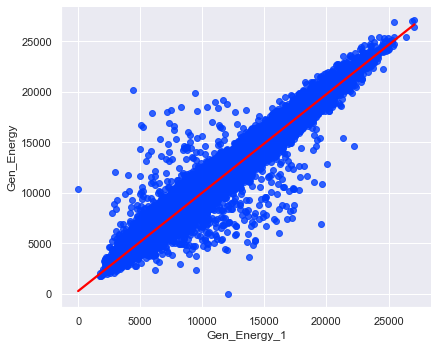

In [51]:
fig = plt.figure(figsize=(10,10), dpi =10)
ax = sns.lmplot(x='Gen_Energy_1', y='Gen_Energy', data=datae, line_kws={'color':'red'}, height=5, aspect=1.25, ci=None)
plt.show()

In [52]:
# Divide the dependent and independent variable 
X1 = pd.DataFrame(datae.iloc[:,1:])
Y1 = pd.DataFrame(datae.iloc[:,0:1])

In [53]:
# Train and test data split for LR # train on 3 years data
a = df.index[df['time']=='2018-01-01 00:00:00+0000'].tolist()
print(a)
tl=a[0]
X1_train = X1[:tl]
X1_test = X1[tl:]
Y1_train = Y1[:tl]
Y1_test = Y1[tl:].reset_index(drop=True)

[28301]


In [54]:
print(X1_train.shape,X1_test.shape,Y1_train.shape,Y1_test.shape)

(28301, 9) (10211, 9) (28301, 1) (10211, 1)


<h3><b>8(a). Linear Regression</b></h3>

In [55]:
# Training Linear Regression Model
Reg_model= LinearRegression()
Reg_model.fit(X1_train,Y1_train)

LinearRegression()

In [56]:
# predicting the test data
LR_pred = Reg_model.predict(X1_test)

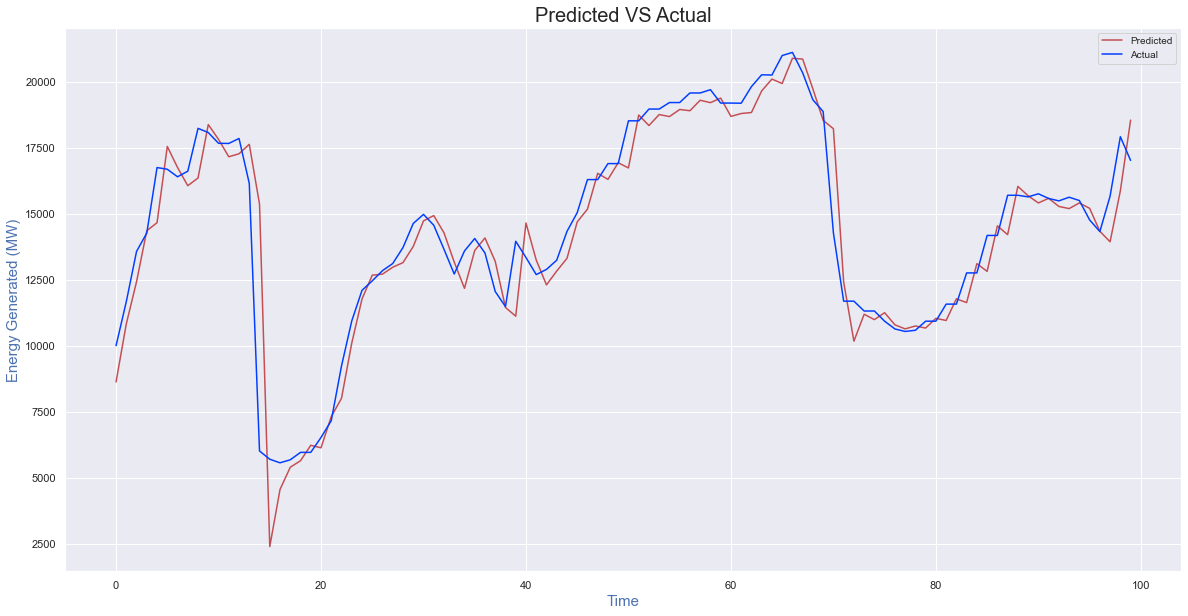

In [57]:
# plot predicted vs actual
plt.subplots(figsize=(20,10))
plt.plot(LR_pred[:100],color='r',label = 'Predicted')
plt.plot(Y1_test[:100],label = 'Actual')
plt.legend(loc="upper right",fontsize=10)
plt.xlabel('Time',size=15, color='b')
plt.ylabel('Energy Generated (MW)',size=15, color='b')
plt.title('Predicted VS Actual',size=20)
plt.show()

In [58]:
#Error Calculation
adj_r2_1 ="{:.3}".format(1 - (1-metrics.r2_score(Y1_test, LR_pred)) * (len(Y1_test)-1)/(len(Y1_test)-X1_test.shape[1]-1))
rmse1 = "{:.5}".format(sqrt(metrics.mean_squared_error(Y1_test,LR_pred)))
mape1 = "{:.2%}".format(metrics.mean_absolute_percentage_error(Y1_test,LR_pred))

LR1_metrics = pd.DataFrame.from_dict({'Adjusted R2': adj_r2_1,'RMSE':rmse1,'MAPE':mape1}, orient ='index',columns=['Logistic Regression'])
LR1_metrics.style

,Logistic Regression
Adjusted R2,0.964
RMSE,780.88
MAPE,4.86%


<h2><b>8(b). LSTM</b></h2>

In [60]:
# defining the LSTM model
LSTM_model = Sequential()
LSTM_model.add(LSTM(50, activation='relu', input_shape=(X1_train.shape[1],1)))
LSTM_model.add(Dense(1))
LSTM_model.compile(optimizer='adam', loss='mse')
history = LSTM_model.fit(X1_train, Y1_train, epochs=30, verbose=0)
LSTM_model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x00000264D6E0F550>>

In [61]:
LSTM_pred = LSTM_model.predict(X1_test, verbose=0)
print(LSTM_pred)

[[ 8630.096 ]
 [10819.6   ]
 [12587.31  ]
 ...
 [ 8429.995 ]
 [ 7276.189 ]
 [ 6581.5317]]


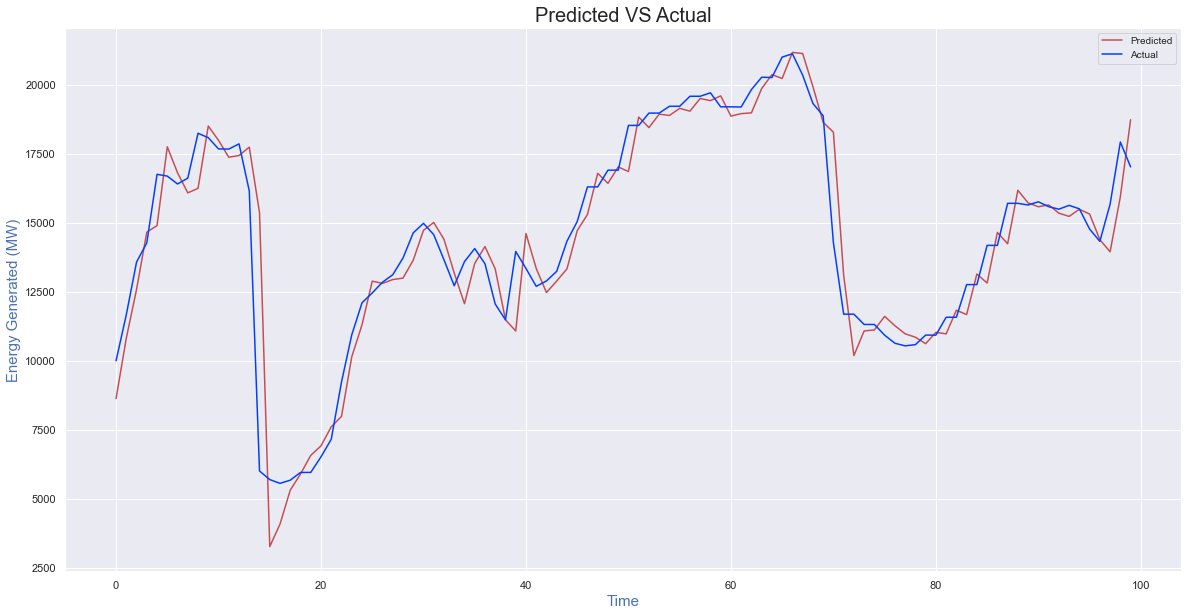

In [62]:
# plot predicted vs actual
plt.subplots(figsize=(20,10))
plt.plot(LSTM_pred[:100],color='r',label ='Predicted')
plt.plot(Y1_test[:100],label = 'Actual')
plt.legend(loc="upper right",fontsize=10)
plt.xlabel('Time',size=15, color='b')
plt.ylabel('Energy Generated (MW)',size=15, color='b')
plt.title('Predicted VS Actual',size=20)
plt.show()

In [63]:
#Error Calculation
adj_r2_2 = "{:.3}".format(1 - (1-metrics.r2_score(Y1_test, LSTM_pred)) * (len(Y1_test)-1)/(len(Y1_test)-X1_test.shape[1]-1))
rmse2 = "{:.5}".format(sqrt(metrics.mean_squared_error(Y1_test,LSTM_pred)))
mape2 = "{:.2%}".format(metrics.mean_absolute_percentage_error(Y1_test,LSTM_pred))

LSTM1_metrics = pd.DataFrame.from_dict({'Adjusted R2': adj_r2_2,'RMSE':rmse2,'MAPE':mape2}, orient ='index',columns=['LSTM'])
LSTM1_metrics.style

,LSTM
Adjusted R2,0.965
RMSE,771.15
MAPE,4.74%


<h2><b>8(c). Support Vector Machine/Regressor</b></h2>

In [64]:
SVM_model = SVR(kernel = 'rbf') # try linear kernel
SVM_model.fit(X1_train, Y1_train)
SVM_pred = SVM_model.predict(X1_test)

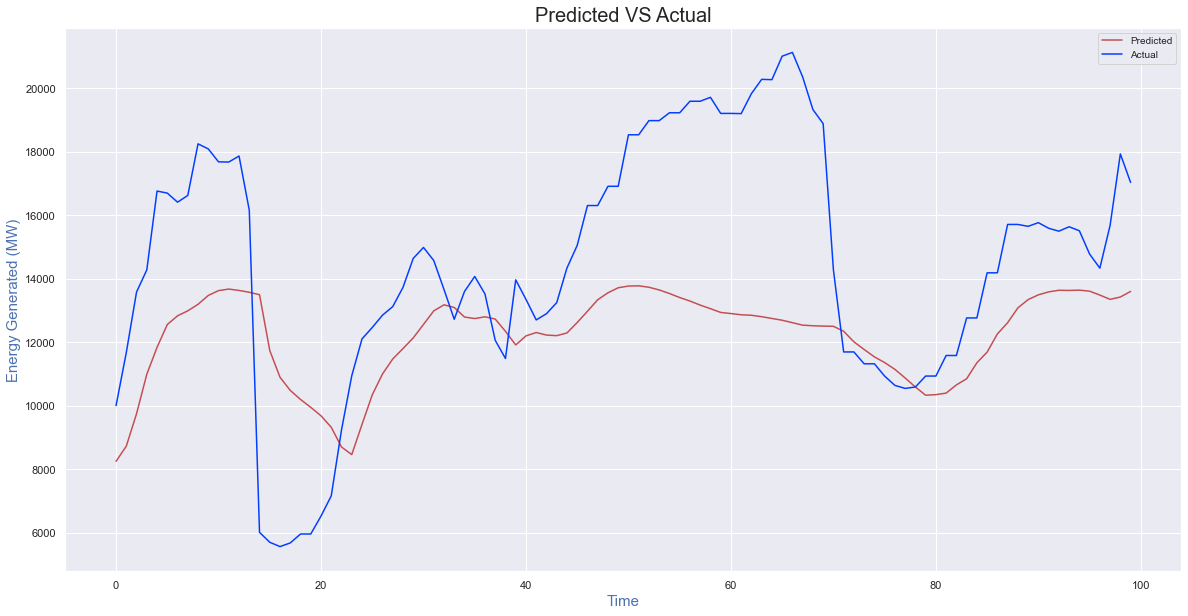

In [65]:
# plot predicted vs actual
plt.subplots(figsize=(20,10))
plt.plot(SVM_pred[:100],color='r', label = 'Predicted')
plt.plot(Y1_test[:100],label = 'Actual')
plt.legend(loc="upper right",fontsize=10)
plt.xlabel('Time',size=15, color='b')
plt.ylabel('Energy Generated (MW)',size=15, color='b')
plt.title('Predicted VS Actual',size=20)
plt.show()

In [66]:
#Error Calculation
adj_r2_2 = "{:.3}".format(1 - (1-metrics.r2_score(Y1_test, SVM_pred)) * (len(Y1_test)-1)/(len(Y1_test)-X1_test.shape[1]-1))
rmse2 = "{:.5}".format(sqrt(metrics.mean_squared_error(Y1_test,SVM_pred)))
mape2 = "{:.2%}".format(metrics.mean_absolute_percentage_error(Y1_test,SVM_pred))

SVM1_metrics = pd.DataFrame.from_dict({'Adjusted R2': adj_r2_2,'RMSE':rmse2,'MAPE':mape2}, orient ='index',columns=['SVM'])
SVM1_metrics.style

,SVM
Adjusted R2,0.556
RMSE,2742.9
MAPE,17.04%


<h2><b>9. TimeSeries Prediction for Energy demand</b></h2>

<b>We are only using the best model for renewable enrgy generation for energy demand</b><br>

In [67]:
# function to generate previous time series data
def n_prev_datad(N):
    m = datad.shape[0]
    for j in range(1,N):
        nth_value = [None]*j + [datad['total load actual'][i-j] for i in range(j, m)]
        new_col = "{}_{}".format('total load actual', j)
        datad[new_col] = nth_value

In [68]:
# Data preperation
datad=df[['total load actual','month']]
n_prev_datad(10)
datad.dropna(inplace=True)
datad.reset_index(drop=True,inplace=True)
datad.head()

,total load actual,month,total load actual_1,total load actual_2,total load actual_3,total load actual_4,total load actual_5,total load actual_6,total load actual_7,total load actual_8,total load actual_9
0,22250.0,1,20637.0,20094.0,20377.0,20010.0,19905.0,20264.0,21286.0,22734.0,24382.0
1,23547.0,1,22250.0,20637.0,20094.0,20377.0,20010.0,19905.0,20264.0,21286.0,22734.0
2,24133.0,1,23547.0,22250.0,20637.0,20094.0,20377.0,20010.0,19905.0,20264.0,21286.0
3,24713.0,1,24133.0,23547.0,22250.0,20637.0,20094.0,20377.0,20010.0,19905.0,20264.0
4,24672.0,1,24713.0,24133.0,23547.0,22250.0,20637.0,20094.0,20377.0,20010.0,19905.0


In [69]:
datad.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total load actual,38512.0,28740.622092,4599.727037,18041.0,24803.00,28959.5,32249.25,41015.0
month,38512.0,6.526979,3.512968,1.0,3.00,7.0,10.00,12.0
total load actual_1,38512.0,28740.522954,4599.860550,18041.0,24803.00,28959.5,32249.25,41015.0
total load actual_2,38512.0,28740.374766,4600.047175,18041.0,24803.00,28959.5,32249.25,41015.0
total load actual_3,38512.0,28740.174984,4600.243320,18041.0,24803.00,28959.5,32249.25,41015.0
total load actual_4,38512.0,28739.922466,4600.455620,18041.0,24802.75,28959.0,32249.25,41015.0
total load actual_5,38512.0,28739.643384,4600.665565,18041.0,24801.75,28959.0,32249.25,41015.0
total load actual_6,38512.0,28739.401174,4600.866230,18041.0,24801.00,28959.0,32249.25,41015.0
total load actual_7,38512.0,28739.259607,4601.011689,18041.0,24800.75,28959.0,32249.25,41015.0
total load actual_8,38512.0,28739.163144,4601.098650,18041.0,24800.00,28959.0,32249.25,41015.0


<Figure size 720x720 with 0 Axes>

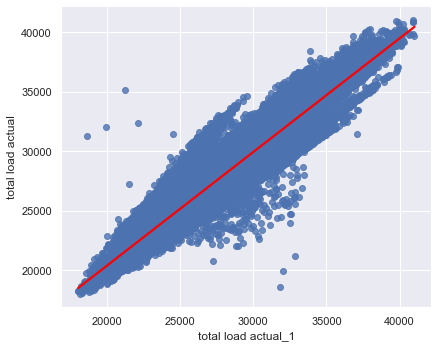

In [70]:
plt.figure(figsize=(10,10))
sns.set(rc={"figure.figsize":(3, 3)})
ax = sns.lmplot(x='total load actual_1', y='total load actual', data=datad, line_kws={'color':'red'}, height=5, aspect=1.25,ci=None)

In [71]:
# Divide the dependent and independent variable 
X2 = pd.DataFrame(datad.iloc[:,1:])
Y2 = pd.DataFrame(datad.iloc[:,0:1])

In [72]:
# Train and test data split
a = df.index[df['time']=='2018-01-01 00:00:00+0000'].tolist()
tl1= a[0]
X2_train = X2[:tl1]
X2_test = X2[tl1:]
Y2_train = Y2[:tl1]
Y2_test = Y2[tl1:].reset_index(drop=True)

In [73]:
print(X2_train.shape,X2_test.shape,Y2_train.shape,Y2_test.shape)

(28301, 10) (10211, 10) (28301, 1) (10211, 1)


<h3><b>9(a). Linear Regression for Energy Demand</b></h3>

In [74]:
# Training Regression Model for Energy Demand 
Reg_model_d= LinearRegression()
Reg_model_d.fit(X2_train,Y2_train)

LinearRegression()

In [75]:
LR_pred_d = Reg_model_d.predict(X2_test)

In [76]:
display(Reg_model_d.coef_)
Reg_model_d.intercept_

array([[-4.03463007,  1.58350819, -0.59169744, -0.08658506,  0.04547494,
        -0.06800995,  0.02699137, -0.02516095,  0.07966019, -0.0294229 ]])

array([1892.34659445])

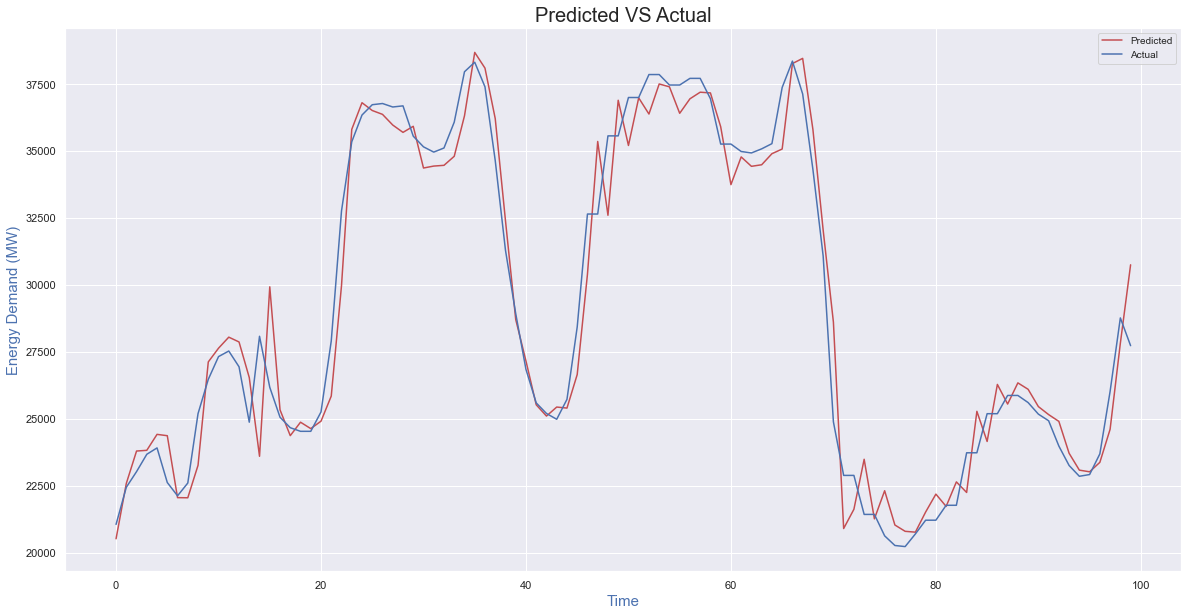

In [77]:
# plot predicted vs actual
plt.subplots(figsize=(20,10))
plt.plot(LR_pred_d[:100],color='r',label ='Predicted')
plt.plot(Y2_test[:100], label ='Actual')
plt.legend(loc="upper right",fontsize=10)
plt.xlabel('Time',size=15, color='b')
plt.ylabel('Energy Demand (MW)',size=15, color='b')
plt.title('Predicted VS Actual',size=20)
plt.show()
plt.show()

In [78]:
#Error Calculation
adj_r2_1 = 1 - (1-metrics.r2_score(Y2_test, LR_pred_d)) * (len(Y2_test)-1)/(len(Y2_test)-X2_test.shape[1]-1)
rmse1 = sqrt(metrics.mean_squared_error(Y2_test,LR_pred_d))
mape1 = "{:.2%}".format(metrics.mean_absolute_percentage_error(Y2_test,LR_pred_d))

LR_metrics = pd.DataFrame.from_dict({'Adjusted R2': adj_r2_1,'RMSE':rmse1,'MAPE':mape1}, orient ='index',columns=['Logistic Regression'])
LR_metrics.style

,Logistic Regression
Adjusted R2,0.956089
RMSE,975.075247
MAPE,2.35%


<b>Predicting the Renewable Energy Generation for next one month</b>

In [79]:
# Preparing the initial data
l_dt=datae[-1:]
l_dt = l_dt[['Gen_Energy', 'Gen_Energy_1', 'Gen_Energy_2', 'Gen_Energy_3',
       'Gen_Energy_4', 'Gen_Energy_5', 'Gen_Energy_6', 'Gen_Energy_7',
       'Gen_Energy_8']]
l_dt.reset_index(drop=True,inplace=True)
l_dt

,Gen_Energy,Gen_Energy_1,Gen_Energy_2,Gen_Energy_3,Gen_Energy_4,Gen_Energy_5,Gen_Energy_6,Gen_Energy_7,Gen_Energy_8
0,6529.0,6906.0,7607.0,8519.0,9264.0,8446.0,7717.0,8372.0,8959.0


In [80]:
# Prediction loop for 365 days
nxt_g=[]
l_dt1 = l_dt.copy()
for i in range(0,30):
    nxtday_pred = Reg_model.predict(l_dt1)
    nxt_g.append(nxtday_pred[0][0])
    x = l_dt1.values.tolist()
    x[0].insert(0,nxtday_pred)
    x[0].pop()
    l_dt1.loc[0] = x[0]

In [81]:
# Preparing the initial data
m_dt=datad[-1:]
m_dt = m_dt[['total load actual', 'total load actual_1',
       'total load actual_2', 'total load actual_3', 'total load actual_4',
       'total load actual_5', 'total load actual_6', 'total load actual_7',
       'total load actual_8']]
m_dt.reset_index(drop=True,inplace=True)
m_dt

,total load actual,total load actual_1,total load actual_2,total load actual_3,total load actual_4,total load actual_5,total load actual_6,total load actual_7,total load actual_8
0,24455.0,25801.0,28071.0,29735.0,30653.0,29592.0,26738.0,26449.0,27009.0


In [82]:
# Prediction loop for 365 days
nxt_d=[]
m_dt1 = m_dt.copy()
for i in range(0,30):
    nxtday_pred = Reg_model.predict(m_dt1)
    nxt_d.append(nxtday_pred[0][0])
    x = l_dt1.values.tolist()
    x[0].insert(0,nxtday_pred)
    x[0].pop()
    m_dt1.loc[0] = x[0]

In [83]:
# converting the list to dataframe
Predicted = pd.DataFrame (nxt_g, columns = ['Gen_nxt'])
pred = pd.DataFrame (nxt_d, columns = ['Dem_nxt'])
Predicted['Dem_nxt'] = pred['Dem_nxt']
Predicted.head()

,Gen_nxt,Dem_nxt
0,6475.602770,23174.929180
1,6530.329255,27346.759891
2,6596.174558,32815.836862
3,6742.471145,39985.543639
4,6995.988178,49384.697379


<b>Comparing all models</b>

In [84]:
Metric_comp = pd.concat([LR1_metrics,LSTM1_metrics,SVM1_metrics],axis=1)
Metric_comp

,Logistic Regression,LSTM,SVM
Adjusted R2,0.964,0.965,0.556
RMSE,780.88,771.15,2742.9
MAPE,4.86%,4.74%,17.04%
